In [3]:
# Import Dependencies
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [19]:
# Grab the data files!
# Country code
excelpath1 = os.path.join('Country_code.xlsx')
CountryCodeISO_df = pd.read_excel(excelpath1)
CountryCodeISO_df.head(3)

# CITES source
CitesSource_df = pd.read_excel('CITES_Source.xlsx') 
print(CitesSource_df.columns.get_values())
CitesSource_df.head(3)

# CITES purpose
CitesPurpose_df = pd.read_excel('CITES_Purpose.xlsx') 
print(CitesPurpose_df.columns.get_values())
CitesPurpose_df.head(3)
#CITES data to analyze
csvpath = os.path.join('WildLifeTrade2016-2017.csv')
CITES_data_df = pd.read_csv(csvpath)
CITES_data_df.head(1)

#Output files
ImporterFile = 'TopImpByTrans_JRE.csv'
ExporterFile = 'TopExpByTrans_JRE.csv'
ImpQtyFile = 'TopImpByQuantity_JRE.csv'
ExpQtyFile = 'TopExpByQuantity_JRE.csv'

['Source Code' 'Source Description']
['Purpose Code' 'Purpose Description']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67400 entries, 0 to 67399
Data columns (total 16 columns):
Year                          67400 non-null int64
App.                          67400 non-null object
Taxon                         67400 non-null object
Class                         47061 non-null object
Order                         67343 non-null object
Family                        66939 non-null object
Genus                         65941 non-null object
Importer                      67329 non-null object
Exporter                      66822 non-null object
Origin                        25667 non-null object
Importer reported quantity    31900 non-null float64
Exporter reported quantity    44226 non-null float64
Term                          67400 non-null object
Unit                          6449 non-null object
Purpose                       61339 non-null object
Source                        66853 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 8.2+

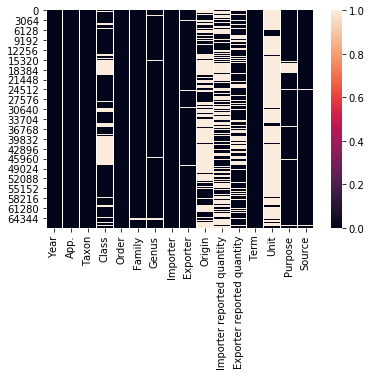

In [20]:
#Visualize initial data
CITES_data_df.info()
sns.heatmap(CITES_data_df.isnull())
plt.show()

In [21]:
# Add the CITES Purpose description
temp_df1 = pd.merge(CITES_data_df, CitesPurpose_df, 
                    left_on=  ['Purpose'],
                   right_on= ['Purpose Code'], 
                   how = 'inner')

#print(temp_df1.columns.get_values())
# drop the purpose code column
del temp_df1['Purpose Code']
print(temp_df1.columns.get_values())
temp_df1.head(3)

# Add the CITES Source description
temp_df2 = pd.merge(temp_df1, CitesSource_df, 
                    left_on=  ['Source'],
                   right_on= ['Source Code'], 
                   how = 'inner')
#print(temp_df2.columns.get_values())
# drop the Source code column
del temp_df2['Source Code']
print(temp_df2.columns.get_values())
temp_df2.head(3)

# Add the Importer Country description
temp_df3 = pd.merge(temp_df2, CountryCodeISO_df,
                    left_on=  ['Importer'],
                    right_on= ['Country Code'], 
                    how = 'inner')
print(temp_df3.columns.get_values())
# drop the Country code column
del temp_df3['Country Code']
temp_df3 = temp_df3.rename(columns={'Country Name':'Importer Country Name'})
print(temp_df3.columns.get_values())
temp_df3.head(3)



# Add the Exporter Country description
temp_df4 = pd.merge(temp_df3, CountryCodeISO_df,
                    left_on=  ['Exporter'],
                    right_on= ['Country Code'], 
                    how = 'inner')
#print(temp_df4.columns.get_values())
# drop the Country code column
del temp_df4['Country Code']
temp_df4 = temp_df4.rename(columns={'Country Name':'Exporter Country Name'})
print(temp_df4.columns.get_values())
temp_df4.head(2)

['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Country Name' 'Country Code']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Importer Country Name']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description,Source Description,Importer Country Name,Exporter Country Name
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
1,2016,I,Panthera tigris,Mammalia,Carnivora,Felidae,Panthera,TR,NL,HU,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands


In [22]:
#######################################################
#Here is the block for data cleaning that you can plut into your code
#The final dataframe is deduped_df

tobecleaned_df =[]
dropnacolumns_df=[]
deduped_df=[]

tobecleaned_df = temp_df4.copy()
tobecleaned_df.shape #totally 60627 rows

#drop columns with all NA values
dropnacolumns_df=tobecleaned_df.dropna(axis=1, how='all')
#len(dropnacolumns_df.columns) #20 column
#len(tobecleaned_df.columns) #20 columns

#remove deduplicates
deduped_df=dropnacolumns_df.drop_duplicates()
deduped_df.shape #removed 3 duplicate rows

#remove column with 89.67% null values
try:
    del deduped_df['Unit'] # This should be run only once, second time will fail since column no longer exist
    #deduped_df.head(1)
except:
    print('column was already removed')

#removed unneeded dataset: the plant (Source is 'A')
#deduped_df.drop(deduped_df[deduped_df.Source=='A'].index, inplace=True)
deduped_df=deduped_df.drop(deduped_df[deduped_df.Source=='A'].index)
deduped_df.shape #49376, 19

#drop the row with 0 quality
deduped_df=deduped_df.drop(deduped_df[deduped_df['Importer reported quantity']==0].index)
#deduped_df.shape
#deduped_df.columns.values
#######################################################

In [23]:
columnsnames= list(deduped_df.columns.values)
nulldict={}
for col in columnsnames:
    deduped_df[col].isnull().sum()
    nulldict[col]=deduped_df[col].isnull().sum()/deduped_df[col].count()*100
    
nulldict    

{'App.': 0.0,
 'Class': 7.3883161512027495,
 'Exporter': 1.1616948041304704,
 'Exporter Country Name': 0.0,
 'Exporter reported quantity': 52.67942731686199,
 'Family': 0.84351129447326501,
 'Genus': 2.0756238241921814,
 'Importer': 0.081078341947907168,
 'Importer Country Name': 0.0,
 'Importer reported quantity': 99.092741935483872,
 'Order': 0.026336047972124306,
 'Origin': 103.11407297708668,
 'Purpose': 0.0,
 'Purpose Description': 0.0,
 'Source': 0.0,
 'Source Description': 0.0,
 'Taxon': 0.0,
 'Term': 0.0,
 'Year': 0.0}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49375 entries, 0 to 60626
Data columns (total 19 columns):
Year                          49375 non-null int64
App.                          49375 non-null object
Taxon                         49375 non-null object
Class                         45978 non-null object
Order                         49362 non-null object
Family                        48962 non-null object
Genus                         48371 non-null object
Importer                      49335 non-null object
Exporter                      48808 non-null object
Origin                        48813 non-null object
Importer reported quantity    24800 non-null float64
Exporter reported quantity    32339 non-null float64
Term                          49375 non-null object
Purpose                       49375 non-null object
Source                        49375 non-null object
Purpose Description           49375 non-null object
Source Description            49375 non-null object
Import

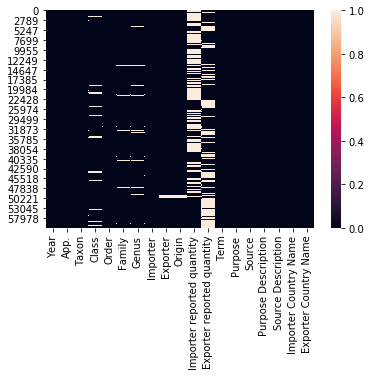

In [24]:
#Replace empty origin column for export values
#deduped_df.loc[deduped_df["Origin"].isnull(),'Origin'] = deduped_df["Exporter"]
#fill blanks with values -- column 'Origin' has 72.05% 
#after this step, only has 562 rows with null value
deduped_df['Origin'].fillna(deduped_df['Exporter'], inplace=True)
#Visualize data
deduped_df.info()
sns.heatmap(deduped_df.isnull())
plt.show()

In [25]:
deduped_df['Importer'].isnull().value_counts()

False    49335
True        40
Name: Importer, dtype: int64

In [26]:
deduped_df['Exporter'].isnull().value_counts()

False    48808
True       567
Name: Exporter, dtype: int64

In [27]:
deduped_df['Origin'].isnull().value_counts()

False    48813
True       562
Name: Origin, dtype: int64

In [28]:
# Group by Importing country
# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByImporterData = deduped_df.groupby(['Importer Country Name'])

# Transaction count
ImportTransactionCount = deduped_df['Importer Country Name'].value_counts()

# Construct the output table
# In order to be visualized, a data function must be used...
TopImporter_df = pd.DataFrame({'Transaction Count': ImportTransactionCount})
# convert the index into a column
TopImporter_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopImporter_df.reset_index(inplace=True)
TopImporter_df = TopImporter_df.rename(columns = {'index' : 'Import Country'})
TopImporter_df.to_csv(ImporterFile, encoding='utf-8', index=False)
TopImporter_df.head(5)

,Import Country,Transaction Count
0,United States of America,8547
1,Japan,3054
2,"Hong Kong, SAR China",1942
3,China,1939
4,Germany,1844


In [29]:
# Group by Exporting Countries
# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByExporterData = deduped_df.groupby(['Exporter Country Name'])

# Transaction count
ExportTransactionCount = deduped_df['Exporter Country Name'].value_counts()

# Construct the output table
# In order to be visualized, a data function must be used...
TopExporter_df = pd.DataFrame({'Transaction Count': ExportTransactionCount})
# convert the index into a column
TopExporter_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopExporter_df.reset_index(inplace=True)
TopExporter_df = TopExporter_df.rename(columns = {'index' : 'Export Country'})
TopExporter_df.to_csv(ExporterFile, encoding='utf-8', index=False)
TopExporter_df.head(5)

,Export Country,Transaction Count
0,Indonesia,6443
1,Italy,4996
2,United States of America,4015
3,France,3442
4,Germany,2288


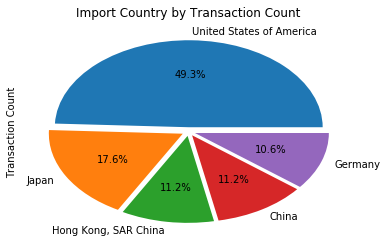

In [30]:
# Top Importer by Importer reported quantities

# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByImpQtyData = deduped_df.groupby(['Importer Country Name'])

# Transaction count
ImportTransCount = deduped_df['Importer Country Name'].value_counts()
ImportRptdQuantity = GrpdByImpQtyData['Importer reported quantity'].sum()
# Construct the output table
# In order to be visualized, a data function must be used...
TopImpQty_df = pd.DataFrame({'Transaction Count': ImportTransCount,
                            'Quantity Imported': ImportRptdQuantity })

# sort and convert the index into a column
TopImpQty_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopImpQty_df.reset_index(inplace=True)
TopImpQty_df = TopImpQty_df.rename(columns = {'index' : 'Import Country'})
TopImpQty_df.to_csv(ImpQtyFile, encoding='utf-8', index=False)
TopImpQty_df2 = TopImpQty_df.head(5)

# Labels for the sections of our pie chart
ImpLabels = TopImpQty_df2['Import Country']
PieTitle = 'Import Country by Transaction Count'

IBT = TopImpQty_df2['Transaction Count']
IC = TopImpQty_df2['Import Country']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
ImpTransPie = IBT.plot(kind = 'pie', y = IC, title = PieTitle,
                     autopct="%1.1f%%", explode = explode,
                     colors = None, shadow=False, startangle=0, labels = ImpLabels)
# "%1.1f%%"
#                      autopct="%1.f%%", explode = None, labels = ImpLabels,

plt.show()


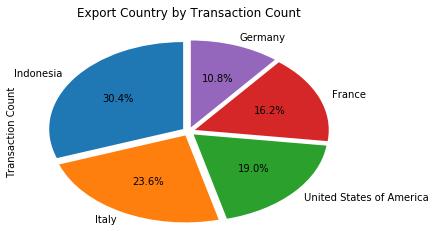

In [31]:
# Top Importer by Exporter reported quantities

# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByExpQtyData = deduped_df.groupby(['Exporter Country Name'])

# Transaction count
ExportTransCount = deduped_df['Exporter Country Name'].value_counts()
ExportRptdQuantity = GrpdByExpQtyData['Exporter reported quantity'].sum()
# Construct the output table
# In order to be visualized, a data function must be used...
TopExpQty_df = pd.DataFrame({'Transaction Count': ExportTransCount,
                            'Quantity Exported': ExportRptdQuantity })

# convert the index into a column
TopExpQty_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopExpQty_df.reset_index(inplace=True)
TopExpQty_df = TopExpQty_df.rename(columns = {'index' : 'Export Country'})
TopExpQty_df.to_csv(ExpQtyFile, encoding='utf-8', index=False)
TopExpQty_df2 = TopExpQty_df.head(5)
PieTitle = 'Export Country by Transaction Count'
ExpLabels = TopExpQty_df2['Export Country']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
EBT = TopExpQty_df2['Transaction Count']
EC = TopExpQty_df2['Export Country']
ExpTransPie = EBT.plot(kind = 'pie', y = EC, title = PieTitle,
                     autopct="%1.1f%%", explode = explode, labels = ExpLabels,
                     colors = None, shadow=False, startangle=90)

plt.show()



In [32]:
column_search_ie = input("Please specify search term for Importer/Exporter/Origin top 10: ")
top_10_region = pd.DataFrame(deduped_df[column_search_ie].value_counts().head(10))
top_10_region['Region'] = top_10_region.index
top_10_region.index = range(10)
top_10_region

Please specify search term for Importer/Exporter/Origin top 10: Importer


,Importer,Region
0,8547,US
1,3054,JP
2,1942,HK
3,1939,CN
4,1844,DE
5,1733,FR
6,1610,CH
7,1250,CA
8,1217,AE
9,1172,SG


In [33]:
taxon_trade_groups = deduped_df.groupby(['App.','Taxon'])['Taxon'].value_counts()
appendices_by_taxon = taxon_trade_groups.groupby(level=0).count()
print('Total traded appendices: %s' %(appendices_by_taxon).sum())
appendices_by_taxon
#list(appendices_by_taxon)

Total traded appendices: 2915


App.
I       513
II     2275
III      89
N        38
Name: Taxon, dtype: int64

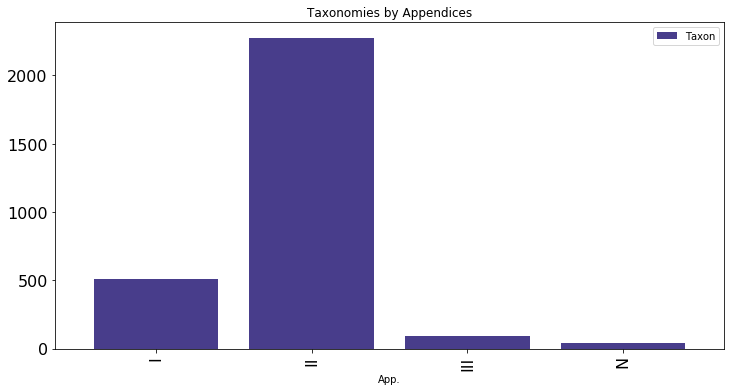

In [34]:
kwargs_figs = {'figsize': (12, 6), 'fontsize': 16, 'facecolor':'darkslateblue', 'alpha':1, 'align':'center', 'width':0.8}
appendices_by_taxon.plot.bar(**kwargs_figs , title ='Taxonomies by Appendices')
plt.legend()
plt.show()

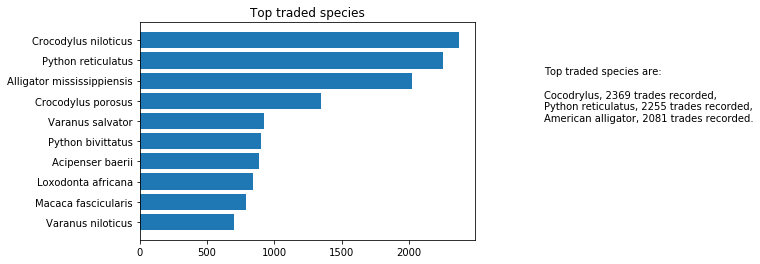

In [35]:
def plot_labels(series):
    labels = [idx for idx in series.index]
    values = [value for value in series.values]
    index = [x for x in range(len(series))]
    return labels,values,index

top_taxon = taxon_trade_groups.groupby(level=1).sum().sort_values(ascending = False).head(10)
top_taxon
fig,ax = plt.subplots()
labels,values,index = plot_labels(top_taxon.sort_values())
ax.barh(index,values)
plt.yticks(index,labels)
ax.set_title('Top traded species')
comments = 'Top traded species are:\n'\
            '\n'\
            'Cocodrylus, 2369 trades recorded,\n'\
            'Python reticulatus, 2255 trades recorded,\n'\
            'American alligator, 2081 trades recorded.'
ax.text(3000,5,comments)
plt.show()

In [36]:
#top_taxon
app_taxon= deduped_df.loc[:, ['Taxon','App.', 'Origin']]
app_taxon2=app_taxon.set_index('Taxon')
a = app_taxon2.loc[['Crocodylus niloticus','Python reticulatus','Alligator mississippiensis','Crocodylus porosus', 'Varanus salvator', 'Python bivittatus','Acipenser baerii', 'Loxodonta africana', 'Macaca fascicularis', 'Varanus niloticus'],:]
a['App.'].value_counts()
#a['App.'].value_counts().sum()

pd.DataFrame(a['App.'].value_counts().head(10))

,App.
II,12298
I,728


Please add your seach term among the following list:['Year', 'App.', 'Taxon', 'Class', 'Order', 'Family', 'Genus', 'Importer', 'Exporter', 'Origin', 'Importer reported quantity', 'Exporter reported quantity', 'Term', 'Purpose', 'Source', 'Purpose Description', 'Source Description', 'Importer Country Name', 'Exporter Country Name'] Class


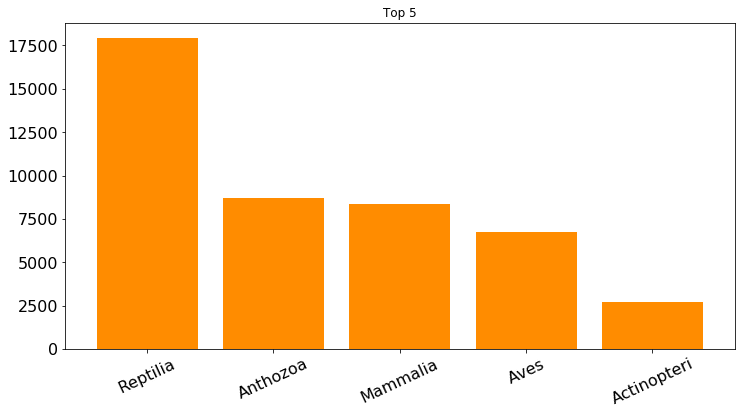

In [37]:
#TOP 5 Data counts
kwargs_figs = {'figsize': (12, 6), 'fontsize': 16, 'facecolor':'darkorange', 'alpha':1, 'align':'center', 'width':0.8}
column_list = list(columnsnames)
search_term = input('Please add your seach term among the following list:%s '%(column_list))
search_list = deduped_df[search_term].value_counts().head(5)
#print(search_list)
search_list.plot.bar(**kwargs_figs, title ='Top 5')
plt.xticks(rotation=25)
plt.show()

In [38]:
#Count by 3 variables
print('These are the possible variables you can use for the search: Class, Family, Genus, Order, App.')

z = input('Specify your first input; this is going to serve as the index')

if z == 'Class':
    print(list(deduped_df['Class'].unique()))
elif z== 'Family':
    print(list(deduped_df['Family'].unique()))
elif z== 'Genus':
    print(list(deduped_df['Genus'].unique()))
elif z== 'Order':
    print(list(deduped_df['Order'].unique()))
elif z== 'Taxon':
    print(list(deduped_df['Order'].unique()))
elif z== 'App.':
    print(list(deduped_df['App.'].unique()))
else:
    print("Oops, that's not in the list, try again")


x = input('Specify from the list above what do you want to search for: ')

y = input('Specify your 2nd variable from the following list: %s' %(columnsnames)) 

print('-----Your search was: Look inside %s, %s. vs %s.-----'%(z,x,y))

wtrade_df = deduped_df.set_index(z)

wtrade_loc_df=wtrade_df.loc[x,y].value_counts().head(10)
pd.DataFrame(wtrade_loc_df)

These are the possible variables you can use for the search: Class, Family, Genus, Order, App.
Specify your first input; this is going to serve as the indexClass
['Aves', 'Mammalia', 'Reptilia', 'Actinopteri', 'Amphibia', 'Anthozoa', nan, 'Bivalvia', 'Arachnida', 'Hirudinoidea', 'Gastropoda', 'Insecta', 'Hydrozoa', 'Elasmobranchii', 'Holothuroidea', 'Dipneusti', 'Coelacanthi']
Specify from the list above what do you want to search for: Reptilia
Specify your 2nd variable from the following list: ['Year', 'App.', 'Taxon', 'Class', 'Order', 'Family', 'Genus', 'Importer', 'Exporter', 'Origin', 'Importer reported quantity', 'Exporter reported quantity', 'Term', 'Purpose', 'Source', 'Purpose Description', 'Source Description', 'Importer Country Name', 'Exporter Country Name']Importer
-----Your search was: Look inside Class, Reptilia. vs Importer.-----


,Importer
US,2601
JP,1318
HK,1047
CN,815
FR,744
CH,716
IT,628
KR,593
SG,509
DE,488


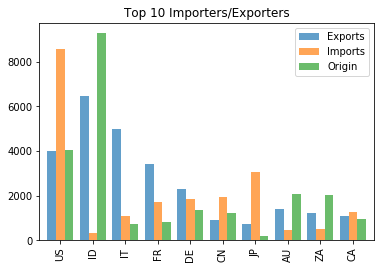

In [39]:
wtrade_df2 = deduped_df
(pd.DataFrame()
     .assign(Imports=wtrade_df2.Importer.value_counts(), Exports=wtrade_df2.Exporter.value_counts(), Origin=wtrade_df2.Origin.value_counts())
     .pipe(lambda df: df.loc[df.fillna(0).sum(axis='columns').sort_values(ascending=False).index])
     .head(10)
     .plot.bar(title="Top 10 Importers/Exporters", width= 0.8 , alpha = 0.7)
)

In [40]:
deduped_df['Source'].value_counts()

W    21437
C    15769
F     4565
I     2103
D     1761
O     1758
R     1737
U      241
X        4
Name: Source, dtype: int64

Text(0.5,1,'Most traded animal goods')

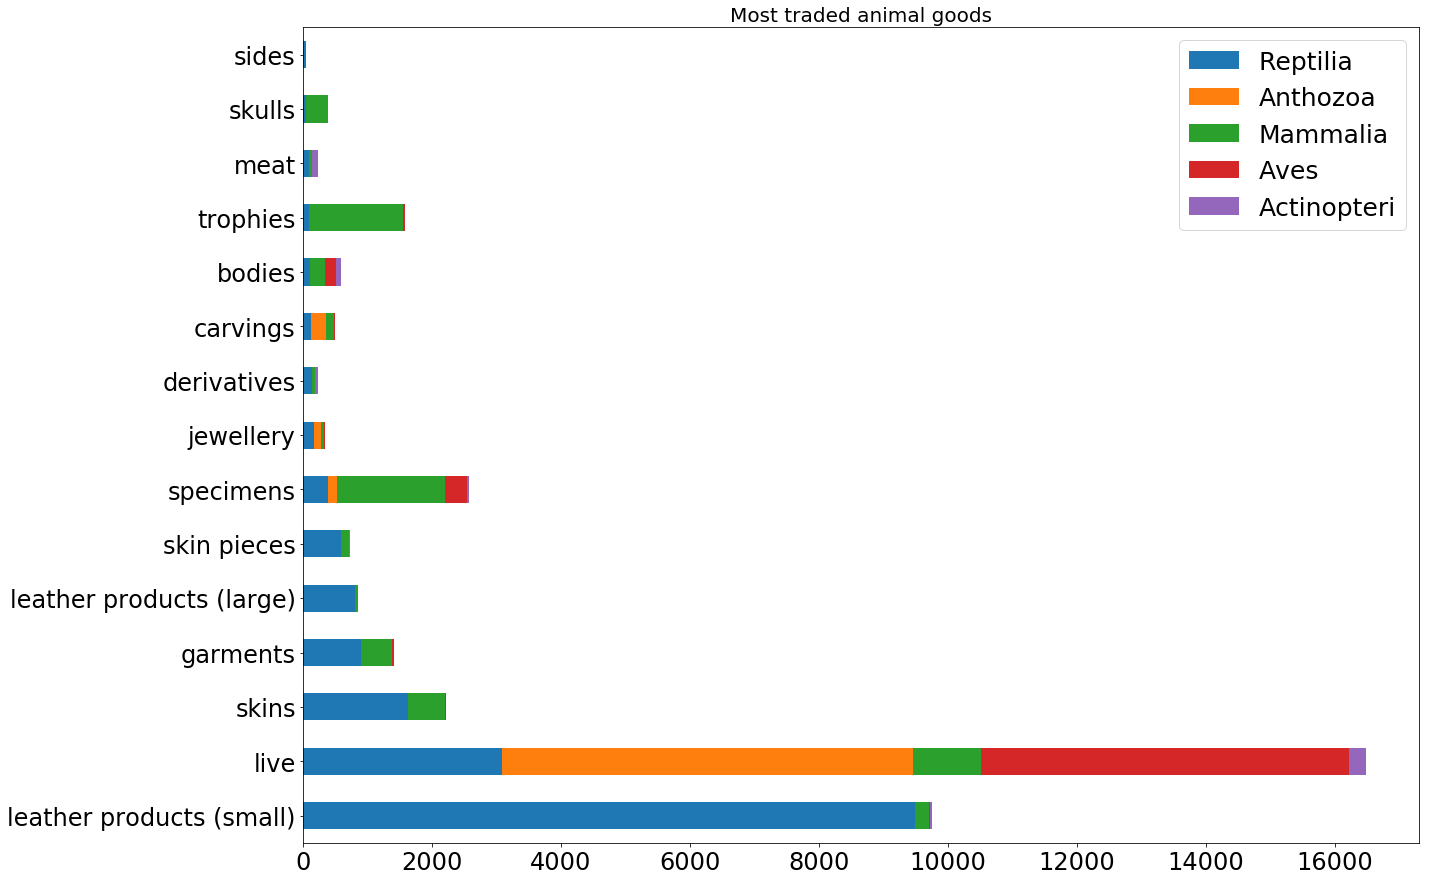

In [41]:

animal_classes = ['Reptilia','Anthozoa','Mammalia','Aves','Actinopteri']
bar_chart = pd.DataFrame()
for i in animal_classes:
    bar_chart[i] = deduped_df['Term'].loc[deduped_df['Class']==i].value_counts()
bar_chart.head(15).plot.barh(figsize=(20,15), fontsize=24, stacked=True)
plt.legend(fontsize=25)
plt.title('Most traded animal goods', fontsize=20)

In [42]:
bar_chart.head(15)

,Reptilia,Anthozoa,Mammalia,Aves,Actinopteri
leather products (small),9486,3.0,215.0,13.0,33.0
live,3084,6377.0,1051.0,5706.0,254.0
skins,1632,NaN,572.0,10.0,12.0
garments,897,2.0,489.0,21.0,8.0
leather products (large),812,1.0,40.0,NaN,5.0
skin pieces,592,NaN,127.0,2.0,5.0
specimens,388,136.0,1674.0,345.0,32.0
jewellery,171,111.0,53.0,8.0,NaN
derivatives,142,3.0,45.0,7.0,44.0
carvings,122,233.0,128.0,13.0,NaN


In [43]:
purpose_list = list(deduped_df['Purpose Description'].unique())

Text(0.5,1,'Most traded purposes per class ')

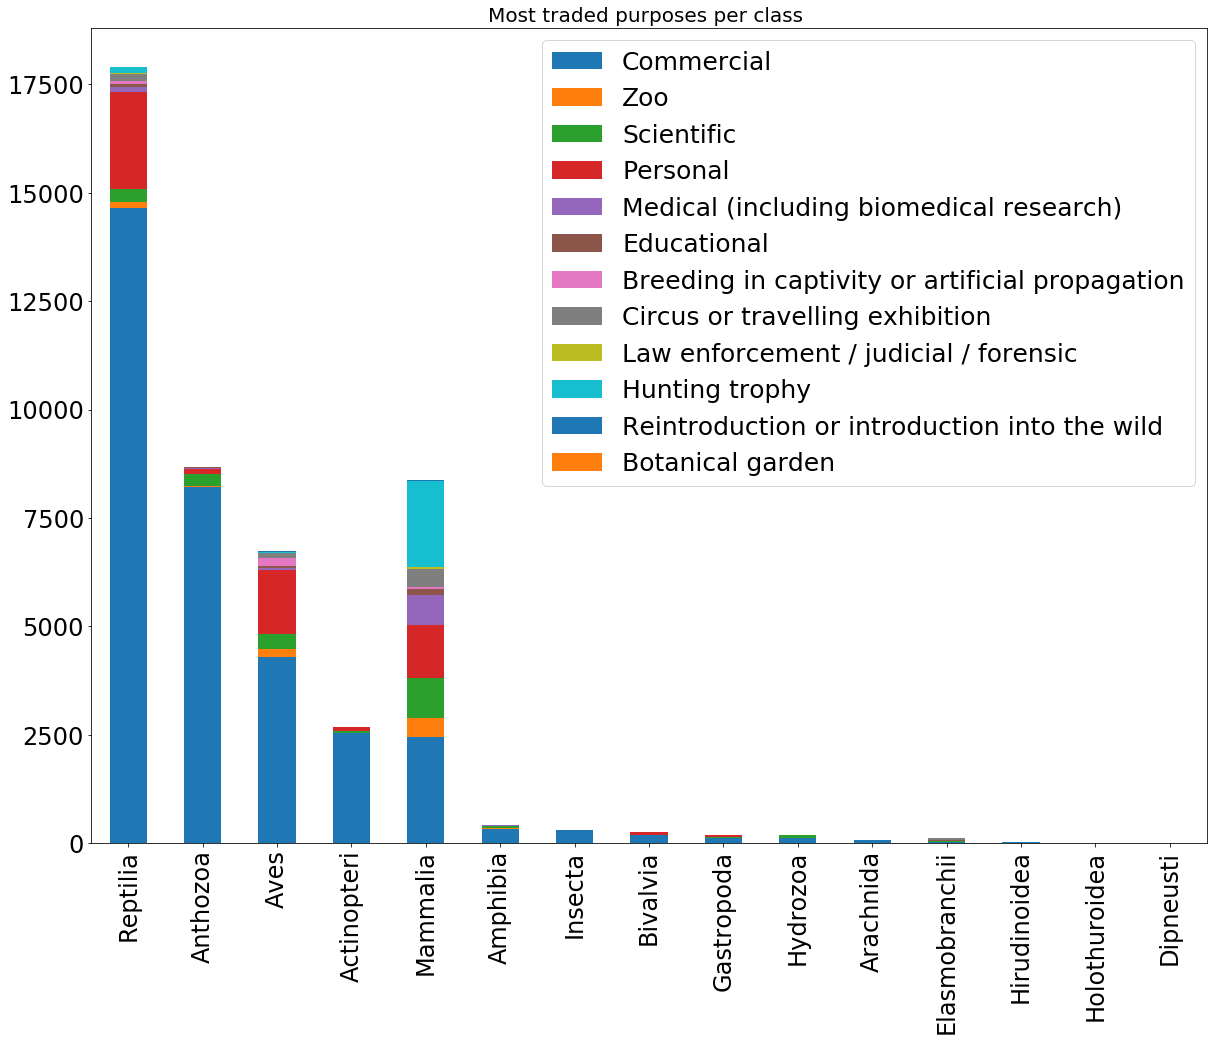

In [44]:

purpose_classes = purpose_list
bar_chart2 = pd.DataFrame()
for i in purpose_classes:
    bar_chart2[i] = deduped_df['Class'].loc[deduped_df['Purpose Description']==i].value_counts()
bar_chart2.head(15).plot.bar(figsize=(20,15), fontsize=24, stacked=True)
plt.legend(fontsize=25)
plt.title('Most traded purposes per class ', fontsize=20)

Specify the taxonomy of the species you want to look for:Crocodylus niloticus


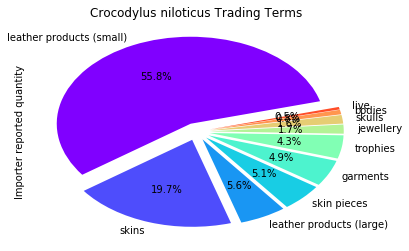

In [45]:
#Search trading terms for importers per species
#Specify top_x and species here:
x = 10
spec_species = input('Specify the taxonomy of the species you want to look for:')
#top 10
#Loxodonta africana, Cocodrylus niloticus

species = deduped_df[deduped_df['Taxon'] == spec_species]
importer_term = species.groupby('Term')['Importer reported quantity'].count().sort_values(ascending = False)
#species.head()

importer_term[:x]
#importer_term[:10]/importer_term[:10].sum()
#100*elephant_term/elephant_term.sum()

# Labels for the sections of our pie chart
PieTitle = '%s Trading Terms' %(spec_species)

importer_term_values = importer_term[:x]
IC = species['Term']
colors = cm.rainbow(np.arange(len(index))/x)
explode = [0]*(len(IBT)-6) + [0.1]*x
ImpTransPie = importer_term_values.plot(kind = 'pie', title = PieTitle,
                     autopct="%1.1f%%", explode = explode,
                     colors = colors, shadow=False, startangle=15)

In [46]:
#Show table of Top 5 importers of species terms
top_terms = species['Term'].value_counts().sort_values(ascending = False)
y = 5
top_y_terms = top_terms[:y]
top_y_terms_names = top_y_terms.index.tolist()

importer_terms_qty = species.loc[species['Term'].isin(top_y_terms_names)].groupby(['Importer Country Name','Term'])['Importer reported quantity'].sum().unstack()

top_importer_qty = importer_terms_qty.sort_values(by=top_y_terms_names[0],ascending = False).head(5).fillna(0)
top_importer_qty 

Term,garments,leather products (large),leather products (small),skin pieces,skins
Importer Country Name,,,,,
Japan,10.0,21.00,69994.50,3659.2,32575.000000
United States of America,828.0,708.00,21514.00,2601.0,1423.000000
"Hong Kong, SAR China",10.0,0.00,11749.00,412.0,3371.000000
France,7.0,24.83,6125.19,4.0,61691.000000
China,207.0,180.00,5861.00,0.0,11806.683782


In [47]:
importer_terms_trades = species.loc[species['Term'].isin(top_y_terms_names)]\
                .groupby(['Importer Country Name','Term'])['Importer reported quantity'].count().unstack()

top_importer_trades = importer_terms_trades.sort_values(by=top_y_terms_names[0],ascending = False).head(5).fillna(0)
top_importer_trades

Term,garments,leather products (large),leather products (small),skin pieces,skins
Importer Country Name,,,,,
United States of America,12.0,25.0,143.0,13.0,13.0
Japan,4.0,6.0,77.0,10.0,25.0
France,4.0,9.0,55.0,1.0,13.0
"Hong Kong, SAR China",6.0,0.0,52.0,9.0,28.0
Italy,4.0,2.0,50.0,13.0,18.0


Specify the class of the species you want to look for:Reptilia


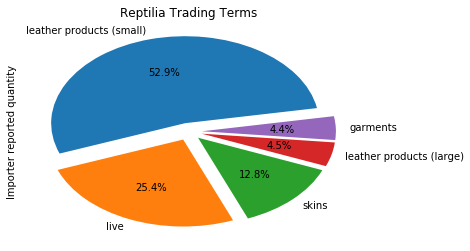

In [48]:
#Search trading classes for importers per species
#Specify top_x and species here:
x = 5
spec_species2 = input('Specify the class of the species you want to look for:')
#top 10
#Loxodonta_africana, Cocodrylus niloticus

species2 = deduped_df[deduped_df['Class'] == spec_species2]
importer_term2 = species2.groupby('Term')['Importer reported quantity'].count().sort_values(ascending = False)
#species.head()

importer_term2[:x]
#importer_term[:10]/importer_term[:10].sum()
#100*elephant_term/elephant_term.sum()

# Labels for the sections of our pie chart
PieTitle = '%s Trading Terms' %(spec_species2)

importer_term2_values = importer_term2[:x]
IC = species['Term']

explode = [0]*(len(IBT)-6) + [0.1]*x
ImpTransPie = importer_term2_values.plot(kind = 'pie', title = PieTitle,
                     autopct="%1.1f%%", explode = explode,
                     shadow=False, startangle=10)

In [6]:
csvpath = os.path.join('GDP_Reptilia.csv')
GPDRep_df = pd.read_csv(csvpath)
GPDRep_df.head(10)


,Year,GDP per Capita,Imported transactions,Exported Transactions,Reptilia leather qty imported,Reptilia leather qty exported
0,2007,47954.532,1661,737,"970,038.00","62,998.00"
1,2008,48302.283,1704,836,"1,149,114.50","52,923.00"
2,2009,46909.422,1672,816,"724,067.00","59,469.00"
3,2010,48310.335,1621,764,"1,212,924.75","44,043.00"
4,2011,49733.884,1612,780,"1,276,268.01","42,176.00"
5,2012,51403.389,1717,693,"1,295,917.00","32,023.00"
6,2013,52741.728,1711,568,"1,242,881.66","35,085.00"
7,2014,54668.078,1574,483,"1,085,927.50","31,204.00"
8,2015,56436.714,1403,477,"1,169,936.64","35,900.00"
9,2016,57607.613,1345,392,"908,050.88","30,707.00"


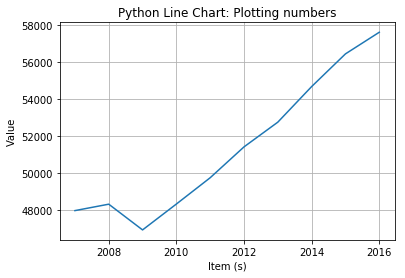

In [7]:
from pylab import *

s = GPDRep_df['GDP per Capita']
t = GPDRep_df['Year']
#s2 = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plot(t, s)
#plot(t, s2)
 
xlabel('Item (s)')
ylabel('Value')
title('Python Line Chart: Plotting numbers')
grid(True)
show()